In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
import os, sys
from collections import defaultdict
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, plot_roc_curve,plot_confusion_matrix
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import scipy

In [2]:
!git clone https://github.com/avidutta20/challenge_may21

Cloning into 'challenge_may21'...
remote: Enumerating objects: 49, done.
remote: Counting objects: 100% (49/49), done.
remote: Compressing objects: 100% (41/41), done.
remote: Total 49 (delta 17), reused 26 (delta 6), pack-reused 0
Unpacking objects: 100% (49/49), done.


In [3]:
os.chdir('/content/challenge_may21/')

In [4]:
def load_data():
    pass
df = pd.read_csv('dataset/av_jobathon_may21_train.csv')

# creating a list of all trainable features name
feature_list = df.columns[1:10]
target = df.columns[10]  # 'Is_Lead' column name

# splitting into train & test
x_train, x_test, y_train, y_test = train_test_split(df[feature_list], df[target], test_size=0.25, random_state=25)


In [5]:
def get_raw_train_data(with_labels = False):
  # splitting into train & test
  x_train, x_test, y_train, y_test = train_test_split(df[feature_list], df[target], test_size=0.25, random_state=25)
    
  if with_labels:
    x_train['Is_Lead'] = y_train

  return x_train

In [6]:
# creating a x_train_complete x_train_df copy
x_train_df = x_train.copy()
x_train_df['Is_Lead'] = y_train

# creating a x_train processing_experimenting copy
x_train_raw = x_train_df.copy()

#Data Processing

In [7]:
def checking_dataset_balance(df,feature_name, target):
  
  class_labels = df[target].unique()
  total_rows = df[target].count()
  class_dict={}
  for label in class_labels:
    class_dict[label] = {'value': df[target].loc[df[target]==label].count()}
    class_dict[label]['perc'] = (df[target].loc[df[target]==label].count())/total_rows
  return class_dict

# checking dataset imbalance
checking_dataset_balance(df,feature_list,target)

# dataset is not imbalanced.

{0: {'perc': 0.7627917387323228, 'value': 187437},
 1: {'perc': 0.23720826126767727, 'value': 58288}}

## Processing Catagorical Values

In [18]:
def execute_process(dframe, colname,func,arg1):
    colname_new = colname + '_proc'
    dframe[colname_new] = dframe[colname].apply(lambda x: func(x,arg1))
    return dframe
def extract_process(value,index):
    value = int(value[index:])
    return value

def replace_values(value, value_dic):
    # replaces any value in the dframe colname with given dict
    return value_dic[value]

def default_value():
    return 0

In [9]:
def process(dframe, default_func = default_value):
  gender_dic = is_active_dic = occupation_dic = defaultdict(default_value)


  gender_dic = is_active_dic = occupation_dic = defaultdict(default_value)
  
  gender_dic = {'Male': 0,
                  'Female': 1}
  is_active_dic = {'Yes': 1,
                  'No': 0}

  occupation_dic = {'Self_Employed': 1,
                      'Other': 2,
                      'Salaried': 3,
                      'Entrepreneur': 4}

  execute_process(dframe,'Region_Code', extract_process, 2)
  print('Region Code Processed Successfully')

  execute_process(dframe,'Channel_Code', extract_process, 1)
  print('Channel Code Processed Successfully')

  execute_process(dframe,'Gender', replace_values, gender_dic)
  print('Gender Processed Successfully')

  execute_process(dframe,'Occupation', replace_values, occupation_dic)
  print('Occupation Processed Successfully')

  execute_process(dframe,'Is_Active',replace_values, is_active_dic)
  print('Is Active Processed Successfully')

  dframe['Credit_Product'] = dframe['Credit_Product'].fillna('No')
  execute_process(dframe,'Credit_Product',replace_values, is_active_dic)
  return dframe

## Cheking SkewNess

In [10]:
# # checking skewness
# scipy.stats.skew(x_train_df['Avg_Account_Balance'])

2.9757408570525747

In [19]:
x_train_df = get_raw_train_data(with_labels=True)

In [20]:
# processing x_train_df
x_train_df = process(x_train_df)

Region Code Processed Successfully
Channel Code Processed Successfully
Gender Processed Successfully
Occupation Processed Successfully
Is Active Processed Successfully


In [21]:
x_train_df

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Region_Code_proc,Channel_Code_proc,Gender_proc,Occupation_proc,Is_Active_proc,Credit_Product_proc
188708,Male,44,RG268,Self_Employed,X3,87,No,543460,No,0,268,3,0,1,0,0
17007,Female,50,RG252,Self_Employed,X2,69,No,891895,Yes,0,252,2,1,1,1,0
109929,Male,77,RG284,Other,X3,81,No,1163416,No,0,284,3,0,2,0,0
81455,Male,74,RG283,Other,X1,14,No,1720031,No,0,283,1,0,2,0,0
77866,Female,25,RG283,Other,X1,21,No,1489690,Yes,0,283,1,1,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130365,Female,68,RG254,Other,X3,93,No,2039817,Yes,0,254,3,1,2,1,0
92303,Female,34,RG284,Salaried,X1,20,No,873268,Yes,0,284,1,1,3,1,0
6618,Male,28,RG253,Other,X1,26,No,1186040,Yes,0,253,1,0,2,1,0
90430,Female,50,RG284,Salaried,X2,55,No,1649000,Yes,1,284,2,1,3,1,0


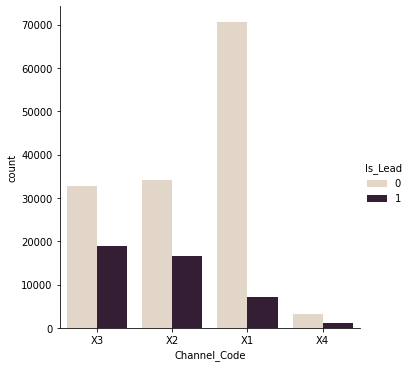

In [22]:
sns.catplot(x='Channel_Code', hue = 'Is_Lead', kind="count", palette="ch:.25", data=x_train_df)

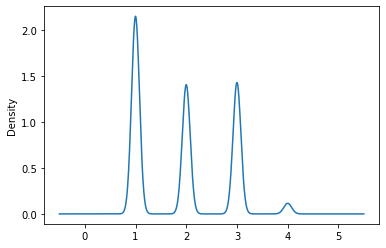

In [23]:
x_train_df['Channel_Code_proc'].plot.kde()

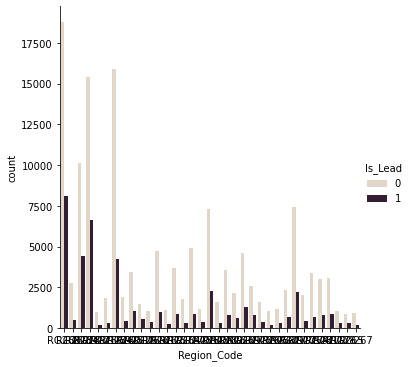

In [25]:
sns.catplot(x='Region_Code', hue = 'Is_Lead', kind="count", palette="ch:.25", data=x_train_df)

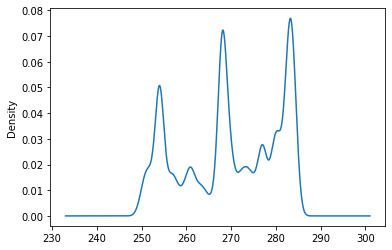

In [24]:
x_train_df['Region_Code_proc'].plot.kde()

In [ ]:
# Checking Integral datas
# columns are:Age, Vintage, Account_Balance

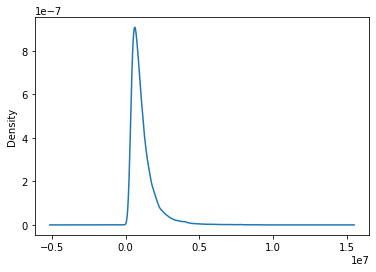

In [30]:
x_train_df['Avg_Account_Balance'].plot.kde()

In [31]:
# the graph shows the average balance is highly right skewed.
# calculating skewness
skew_ac_bal = scipy.stats.skew(x_train_df['Avg_Account_Balance'])
# a +ve high value as expected
skew_ac_bal

2.9757408570525747

## log transform

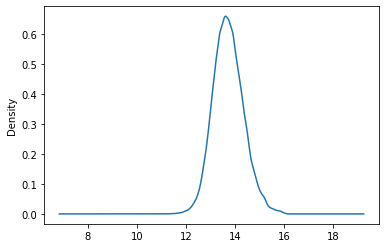

In [32]:
# let's log transform it reduce to reduce it's skewness
#log_transforming
def log_transform(x):
  result = 0.0
  if x!=0:
    result = np.log(x)
  else:
    result = np.log(0.00001)
  return result

x_train_df['Avg_Account_Balance_log'] = x_train_df['Avg_Account_Balance'].apply(lambda x: log_transform(x))
x_train_df['Avg_Account_Balance_log'].plot.kde()

In [33]:
# checking new skew
skew_ac_bal_log = scipy.stats.skew(x_train_df['Avg_Account_Balance_log'])
print(f'Skew after applying log_transform to "Avg_Account_Balance_log is {skew_ac_bal_log}"')
# which is less than +0.5 showing a good normal curve as we wanted

Skew after applying log_transform to "Avg_Account_Balance_log is 0.23654555482098255"


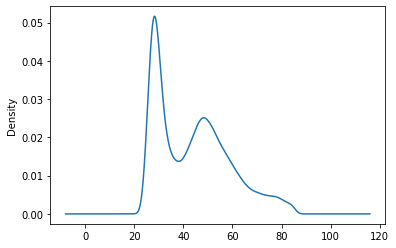

In [34]:
# Age
x_train_df['Age'].plot.kde()

In [35]:
# the graph shows the age is also not normal.
# based on inspecting we will break the age into three groups based on the local minimas in graph
# 0-20, 20-40,40-60, 60 and up
def bin_age(x):
  # catagories = ['0-20','20-40','40-60','60+']
  cat = ''
  
  if x>20 and x<=40:
    cat = '20-40'
  elif x>40 and x<=60:
    cat = '40-60'
  elif x>60 :
    cat = '60+'
  else :
    cat = '0-20'
  return cat



In [36]:
x_train_df['Age_Binned'] = x_train_df['Age'].apply(lambda x: bin_age(x))
x_train_df

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Region_Code_proc,Channel_Code_proc,Gender_proc,Occupation_proc,Is_Active_proc,Credit_Product_proc,Avg_Account_Balance_log,Age_Binned
188708,Male,44,RG268,Self_Employed,X3,87,No,543460,No,0,268,3,0,1,0,0,13.205711,40-60
17007,Female,50,RG252,Self_Employed,X2,69,No,891895,Yes,0,252,2,1,1,1,0,13.701104,40-60
109929,Male,77,RG284,Other,X3,81,No,1163416,No,0,284,3,0,2,0,0,13.966871,60+
81455,Male,74,RG283,Other,X1,14,No,1720031,No,0,283,1,0,2,0,0,14.357853,60+
77866,Female,25,RG283,Other,X1,21,No,1489690,Yes,0,283,1,1,2,1,0,14.214079,20-40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130365,Female,68,RG254,Other,X3,93,No,2039817,Yes,0,254,3,1,2,1,0,14.528371,60+
92303,Female,34,RG284,Salaried,X1,20,No,873268,Yes,0,284,1,1,3,1,0,13.679998,20-40
6618,Male,28,RG253,Other,X1,26,No,1186040,Yes,0,253,1,0,2,1,0,13.986131,20-40
90430,Female,50,RG284,Salaried,X2,55,No,1649000,Yes,1,284,2,1,3,1,0,14.315680,40-60


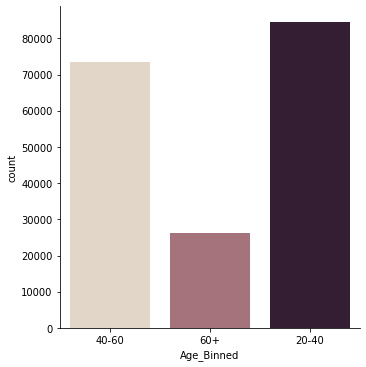

In [37]:
sns.catplot(x='Age_Binned', kind="count", palette="ch:.25", data=x_train_df)

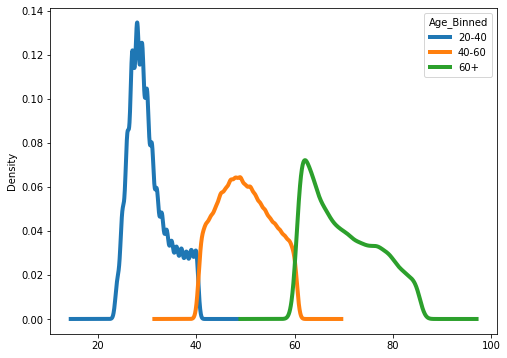

In [38]:
# Converting to wide dataframe
data_wide = x_train_df.pivot(columns = 'Age_Binned',
                     values = 'Age')
  
# plotting multiple density plot
data_wide.plot.kde(figsize = (8, 6),
                   linewidth = 4)

## age next transform

In [ ]:
# We see that the graph are normal in their group

In [41]:
# x_train['Age_log'] = x_train['Age'].apply(lambda x: log_transform(np.exp(x)))
# x_train['Age_Binned_log'] = x_train['Age_log'].apply(lambda x: bin_age(x))
# using box_cox transform
# transform training data & save lambda value
x_train_df['Age_box'], fitted_lambda = scipy.stats.boxcox(x_train_df['Age'])

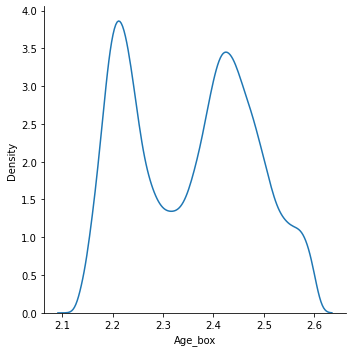

In [42]:
sns.displot(x='Age_box',kind='kde',data=x_train_df)

In [44]:
# # Converting to wide dataframe
# data_wide = x_train_df.pivot(columns = 'Age_Binned_log',
#                      values = 'Age_box')
  
# # plotting multiple density plot
# data_wide.plot.kde(figsize = (8, 6),
#                    linewidth = 4)

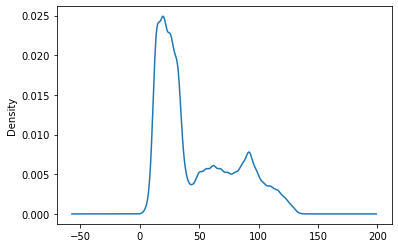

In [45]:
# Vintage
x_train_df['Vintage'].plot.kde()

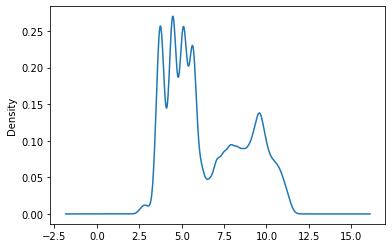

In [46]:
x_train_df['Vintage_sqrt'] = x_train_df['Vintage'].apply(lambda x: np.sqrt(x))
x_train_df['Vintage_sqrt'].plot.kde()

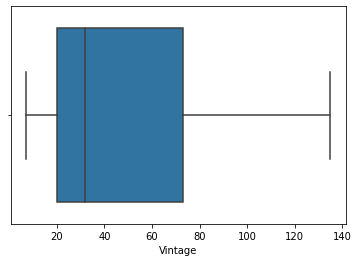

In [47]:
sns.boxplot(x='Vintage',data=x_train_df)

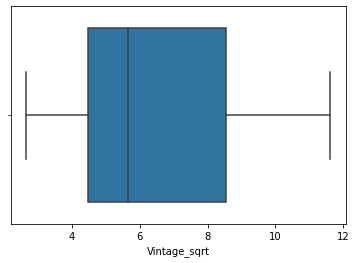

In [48]:
sns.boxplot(x='Vintage_sqrt',data=x_train_df)

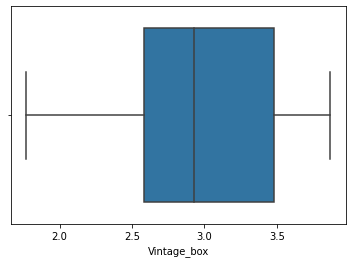

In [49]:
x_train_df['Vintage_box'], fitted_lambda = scipy.stats.boxcox(x_train_df['Vintage'])
sns.boxplot(x='Vintage_box',data=x_train_df)

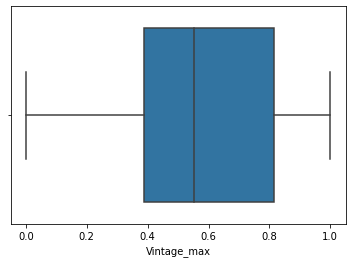

In [50]:
normalize = MinMaxScaler()
array = np.asanyarray(x_train_df['Vintage_box'])
array = array.reshape(-1,1)

array_norm = normalize.fit_transform(array)

std_scaler = StandardScaler()
array_std = std_scaler.fit_transform(array_norm)

# applying both the functions
x_train_df['Vintage_max'] = array_norm
# x_train['Vintage_std'] = array_std

sns.boxplot(x='Vintage_max',data=x_train_df)


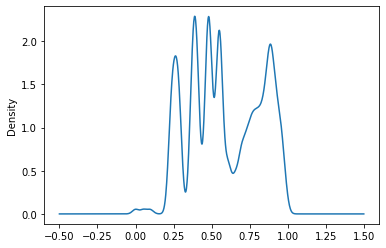

In [51]:
x_train_df['Vintage_max'].plot.kde()

## tranform function

In [100]:
def transorm(dframe):
  # apply the transformations in dframe
  
  # ---------------------------------------------------------------------------
  
  def bin_age(x):
    # catagories = ['0-20','20-40','40-60','60+']
    cat = ''
    
    if x>20 and x<=40:
      cat = '20-40'
    elif x>40 and x<=60:
      cat = '40-60'
    elif x>60 :
      cat = '60+'
    else :
      cat = '0-20'
    return cat

  def log_transform(x):
    # transforms x to log
    result = 0.0
    if x!=0:
      result = np.log(x)
    else:
      result = np.log(0.00001)
    return result

  # ----------------------------------------------------------------------------
  
  # transforming age
  # creating age bins
  dframe['Age_Binned'] = dframe['Age'].apply(lambda x: bin_age(x))
  
  # applying boxcox transformation
  dframe['Age_box'], fitted_lambda = scipy.stats.boxcox(dframe['Age'])

  # transforming balance
  dframe['Avg_Account_Balance_log'] = dframe['Avg_Account_Balance'].apply(lambda x: log_transform(x))

  # transforming vintage

  # reshaping the column to apply minmax scaler
  array = np.asanyarray(dframe['Vintage_box'])
  array = array.reshape(-1,1)
  
  # normalizing using minmax scaler
  normalize = MinMaxScaler()
  array_norm = normalize.fit_transform(array)

  # applying standard_scaler
  std_scaler = StandardScaler()
  array_std = std_scaler.fit_transform(array_norm)

  # applying both the functions
  dframe['Vintage_max'] = array_norm

  return dframe



In [53]:
x_train_df.columns

Index(['Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code', 'Vintage',
       'Credit_Product', 'Avg_Account_Balance', 'Is_Active', 'Is_Lead',
       'Region_Code_proc', 'Channel_Code_proc', 'Gender_proc',
       'Occupation_proc', 'Is_Active_proc', 'Credit_Product_proc',
       'Avg_Account_Balance_log', 'Age_Binned', 'Age_box', 'Vintage_sqrt',
       'Vintage_box', 'Vintage_max'],
      dtype='object')

In [ ]:
['Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code', 'Vintage',
       'Credit_Product', 'Avg_Account_Balance', 'Is_Active', 'Is_Lead',
 
       ['Region_Code_proc', 'Channel_Code_proc', 'Gender_proc',
       'Occupation_proc', 'Is_Active_proc', 'Credit_Product_proc',
       'Avg_Account_Balance_log', 'Age_Binned', 'Age_box', 'Vintage_max']

## jump here

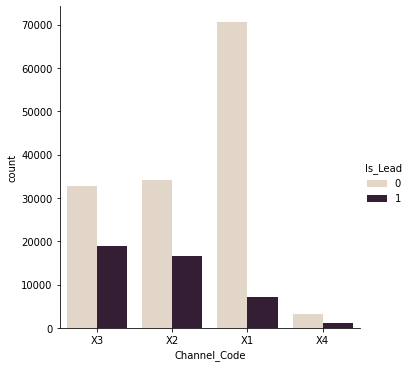

In [24]:
# sns.catplot(x="Channel_Code", kind="count", hue = "Is_Lead", palette="ch:.25", data=x_train_visual)
# # df['Channel_Code'].plot.kde()

# #jump Here

In [99]:
x_train.columns

Index(['Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code',
       'Vintage_max', 'Credit_Product', 'Is_Active',
       'Avg_Account_Balance_log'],
      dtype='object')

In [92]:
# # processing x_train
# x_train = process(x_train)
# print('X_Train processed successfully!')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Region Code Processed Successfully
Channel Code Processed Successfully
Gender Processed Successfully
Occupation Processed Successfully
Is Active Processed Successfully
X_Train processed successfully!


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [97]:
# processing df matrix
# df_processed = process(df)

In [98]:
# corr_mat_process = df_processed.corr(method = 'kendall')
# corr_mat_process

In [96]:
# corr_mat = x_train.corr()
# # corr_mat

In [95]:
# type(corr_mat)

# Model Fitting

In [ ]:
# %% Implementing Random Forests

clf_rforest = RandomForestClassifier(random_state= 10, max_features="log2", oob_score= True)
clf_rforest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=10, verbose=0,
                       warm_start=False)

In [ ]:
x_train

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Is_Active,Avg_Account_Balance_log
188708,0,44,268,1,3,87,0,0,13.205711
17007,1,50,252,1,2,69,0,1,13.701104
109929,0,77,284,2,3,81,0,0,13.966871
81455,0,74,283,2,1,14,0,0,14.357853
77866,1,25,283,2,1,21,0,1,14.214079
...,...,...,...,...,...,...,...,...,...
130365,1,68,254,2,3,93,0,1,14.528371
92303,1,34,284,3,1,20,0,1,13.679998
6618,0,28,253,2,1,26,0,1,13.986131
90430,1,50,284,3,2,55,0,1,14.315680


In [ ]:
# %%
# getting important features
feature_list = x_train.columns
imp_feature = {}
for feat_name, weight in zip(feature_list, clf_rforest.feature_importances_):
    imp_feature[feat_name] = weight


for key in imp_feature:
    print(f'{key} : {round(imp_feature[key],5)*100}')

Gender : 2.007
Age : 19.209
Region_Code : 13.352
Occupation : 5.348
Channel_Code : 5.545
Vintage : 20.479
Credit_Product : 1.37
Is_Active : 1.657
Avg_Account_Balance_log : 31.034


In [ ]:
# processing x_test
x_test = process(dframe= x_test)


Region Code Processed Successfully
Channel Code Processed Successfully
Gender Processed Successfully
Occupation Processed Successfully
Is Active Processed Successfully


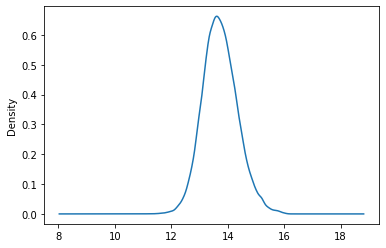

In [ ]:
x_test['Avg_Account_Balance_log'] = x_test['Avg_Account_Balance'].apply(lambda x: log_transform(x))
x_test['Avg_Account_Balance_log'].plot.kde()

In [ ]:
x_test.pop('Avg_Account_Balance')

171739    1237838
98848      678162
184607     343593
61725      960701
48107     2209273
           ...   
236899    1914950
65610     1052300
42881      387123
199081     630387
104851     336206
Name: Avg_Account_Balance, Length: 61432, dtype: int64

In [ ]:
x_test

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Is_Active,Avg_Account_Balance_log
171739,1,30,274,2,1,33,0,0,14.028877
98848,0,29,256,3,1,14,0,1,13.427141
184607,1,29,270,3,1,20,1,0,12.747213
61725,0,28,268,3,1,15,0,1,13.775419
48107,0,57,268,3,2,50,0,0,14.608174
...,...,...,...,...,...,...,...,...,...
236899,0,65,283,2,3,91,0,1,14.465202
65610,1,28,250,3,1,13,1,0,13.866489
42881,1,27,266,3,1,19,0,0,12.866498
199081,0,43,276,1,2,68,0,1,13.354089


In [ ]:
y_hat_rforest = clf_rforest.predict(x_test)
y_hat_rf_proba = clf_rforest.predict_proba(x_test)

In [ ]:
accuracy = accuracy_score(y_true=y_test, y_pred=y_hat_rforest)
print(accuracy)

0.7775589269436124


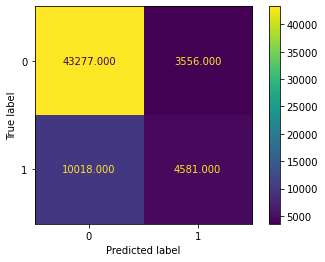

In [ ]:
plot_confusion_matrix(estimator= clf_rforest,X=x_test, y_true=y_test, values_format= '.3f')

In [ ]:
roc_auc_score(y_true=y_test, y_score=y_hat_rf_proba[:,1])

0.7564351520185456

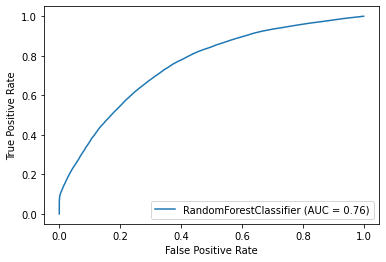

In [ ]:
plot_roc_curve(clf_rforest, X=x_test, y=y_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:

# using logistic_regression
clf_logistic = LogisticRegression()
clf_logistic.fit(x_train, y_train)
y_hat_logistic = clf_logistic.predict(x_test)

In [ ]:
import matplotlib
from matplotlib import pyplot as plt

In [ ]:
def metrics(Pred, Classifier, X_Test=x_test, labels=y_test):
  # prints different metrics
  accuracy = accuracy_score(y_true=labels, y_pred=Pred)
  roc_auc = roc_auc_score(y_true=labels, y_score=Pred)
  print(f'Accuracy: {accuracy} \n ROC_AUC_Score: {roc_auc}')
  
  
  
  plot_confusion_matrix(estimator= Classifier,X=X_Test, y_true=labels, values_format= '.3f')

  
  plot_roc_curve(Classifier, X=X_Test, y=labels)

  return accuracy, roc_auc_score



Accuracy: 0.7775589269436124 
 ROC_AUC_Score: 0.6171801889192811


(0.7775589269436124, <function sklearn.metrics._ranking.roc_auc_score>)

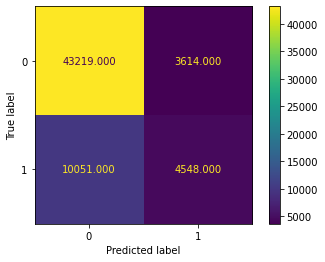

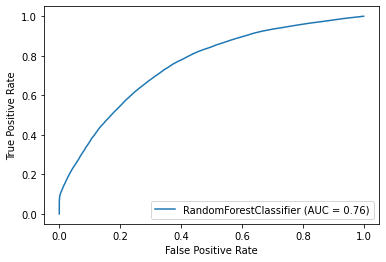

In [ ]:
metrics(y_hat_rforest,clf_rforest)

Accuracy: 0.7177041281416852 
 ROC_AUC_Score: 0.6854151417165041


(0.7177041281416852, <function sklearn.metrics._ranking.roc_auc_score>)

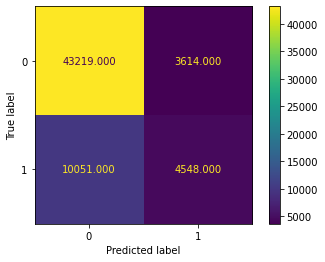

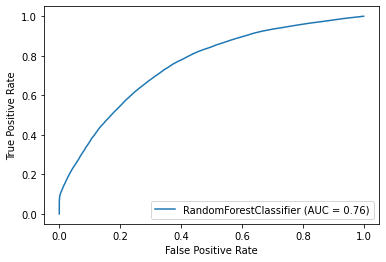

In [ ]:
threshold = 0.3
predicted = (y_hat_rf_proba [:,1] >= threshold).astype('int')
metrics(predicted,clf_rforest)

In [ ]:
from sklearn.svm import SVC

In [ ]:
clf_svc = SVC(kernel='poly',degree=3 ,random_state= 25)
clf_svc.fit(x_test, y_test)
y_hat_svc = clf_svc.predict(x_test)


Accuracy: 0.7623551243651517 
 ROC_AUC_Score: 0.5


(0.7623551243651517, <function sklearn.metrics._ranking.roc_auc_score>)

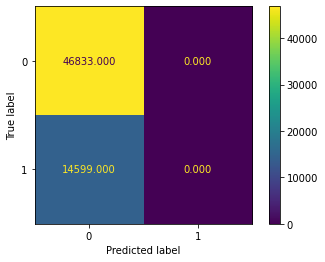

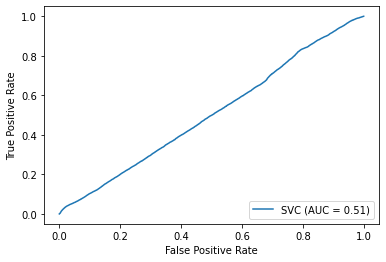

In [ ]:
metrics(y_hat_svc,clf_svc)

In [ ]:

label_name = [1,0]
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(clf_rforest.estimators_[0],
               feature_names = feature_list, 
               class_names=label_name,
               filled = True);

fig.savefig('rf_individualtree.png')